 # Practice  Hard SVM.
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Hard SVM \\
  Termina      : 12:45
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----


  



In [1]:
# Importando librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxopt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Lagrange Multipliers

$\frac{\partial f(x)}{ \partial x} = λ \frac{\partial g(  x)}{ \partial x}$

----
Find the values of  $λ_i$ for each training elements $X_i$.

The  ***GetLambda*** function returns a vector that we will call  lambda, such that   $lambda[i]$ will be  $0$, if the element  $X[i]$ does not intersect with any of the lines   $XW^t + b >=1$ o $XW^t + b >=0$

Note: X is a matrix, so $X_i$ will be a  $K$-dimensional vector that represent the  i-th  object or  $k$-dimensional point, and  $X_{ij}$ is  the  j-th  element of the  i-th objet.

----


- **Note: The code for finding the lambda values is provided to you.**

In [2]:
import numpy as np
from cvxopt import matrix, solvers

def GetLambda(X, y):
    n, m = X.shape
    y = y.astype(float)
    K = np.dot(X, X.T) * np.dot(y, y.T)  # Kernel
    P = matrix(K)
    q = matrix(-np.ones(n))
    G = matrix(-np.eye(n))
    h = matrix(np.zeros(n))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alpha = np.array(sol['x'])
    return alpha

#Ejemplo para utilizar esta función
#lamda = GetLambda(X,Y)
#sv = lamda > 1e-5
#print(sv)

## 2 Calculation of the Weights W
$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  

----
Where: $λ_i$ represent  $i-th$ lagrange multiplier, $W_j$ is the $j-th$ weight,   $x_{ij}$ denotes the value of feacture $(j)$ for the $(i)-th$ training objetc, and $y_i$ is the expected output (1 or -1) for the $i-th$ object.

$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  
Note that the summation only includes elements for which the Lagrange

----

multiplier $lamnda_i$ is nonzero.



In [3]:
def Get_W(X,Y,lambda_list):
    res = np.matmul(X.T, Y * lambda_list)
    return res

## Finding the Bias (b)

$XW^t + b = 0$

$b = - \frac{1}{n}∑_{i=0}^n X_iW^t$

Where $X_i$ is a $k$-dimensional vector representing the $i$-th object, and $k$ is the number of features of the object.



In [4]:
def Get_b(X,W):
  print("W shape: ", W.shape)
  print("X shape: ", X.shape)
  return (-1 * np.dot(W.T, X.T))/X.shape[0]

## Testing Stage

----
For this stage, one should only calculate :

- $f(X_j) = X_jW^t + b$

But since we have already calculated the values of the parameters $W$ and  $b$, then by substituting we have :

- $f(X_j) = \sum_{i=0}^n \lambda_iy_i<X_{i},X_{j}> + b$

Donde: $X_i$ is the i-th  training vector and  $X_j$   is the new vector that passes through the model for predicting the class (1 or -1)

Finally, to determine which class the new vector $X_j$   belongs to, it is sufficient to check the sign of f(X_j).

  - **If $f(X_j) >=0$ then $Y_j$ = 1 else $Y_j = -1$**
  -----

In [5]:
def Test(X,W,b):
  y = np.dot(W.T, X.T) + b
  return y

Database for Testing:
[Download](https://docs.google.com/spreadsheets/d/15-E3kiLJ6bCyXuJvSmxYAp2QYMkPX2QlQ597fAsPYy8/edit#gid=0).

----
Download the database to your disk and use files.upload() to load it onto the drive. The code is provided.
----


- Split the dataset into 70% for training and 30% for testing.
- Add a value of 1 for the first class and -1 for the second class.
- In the testing stage, find the number of elements correctly classified and the number of elements incorrectly classified for each class

- Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which will show us the efficiency of the method.

- Do not forget to normalize the data.

- Plot the lines that separate both classes.

----


In [6]:
# code for loading  the Dataset
import pandas as pd
import numpy as np

filename = {"db.csv": "https://raw.githubusercontent.com/renatopp/arquivos/master/iris.csv"}
name = list(filename.keys())[0]
data = pd.read_csv(name)

X = data[["sepal.length","sepal.width","petal.length","petal.width"]]
Y = data[["variety"]]
print(X)

# Splitting the dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , random_state=104,  test_size=0.30,    shuffle=True)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()


    sepal.length  sepal.width  petal.length  petal.width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
..           ...          ...           ...          ...
95           5.7          3.0           4.2          1.2
96           5.7          2.9           4.2          1.3
97           6.2          2.9           4.3          1.3
98           5.1          2.5           3.0          1.1
99           5.7          2.8           4.1          1.3

[100 rows x 4 columns]


     pcost       dcost       gap    pres   dres
 0: -1.9063e+00 -3.5840e+00  7e+01  8e+00  2e+00
 1: -5.5996e-01 -1.8345e+00  6e+00  6e-01  1e-01
 2: -3.7714e-01 -1.0472e+00  7e-01  8e-17  5e-15
 3: -5.6792e-01 -7.6415e-01  2e-01  1e-16  4e-15
 4: -7.1852e-01 -7.5202e-01  3e-02  1e-16  4e-15
 5: -7.4320e-01 -7.4360e-01  4e-04  8e-17  4e-15
 6: -7.4349e-01 -7.4350e-01  4e-06  2e-16  6e-15
 7: -7.4349e-01 -7.4349e-01  4e-08  2e-16  5e-15
Optimal solution found.
W shape:  (4, 1)
X shape:  (30, 4)


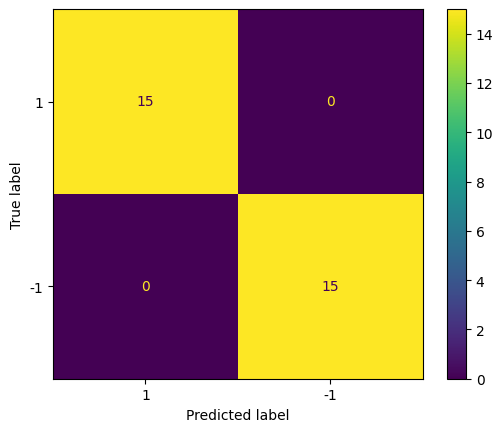

In [7]:
# Obtaining the values of the parameters W and b, to predict the classes to which the values of X_test belong
lambda_list = GetLambda(X_test,Y_test)
W =  Get_W(X_test,Y_test,lambda_list)
b =  Get_b(X_test,W)

# Convert all values greater than 0 to 1, and those less than 0 to -1
Y_pred  = np.sign(Test(X_test,W,b))

# We create a confution matrix
Y_pred = Y_pred[0]
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, -1])
cm_display.plot()
plt.show()


----

- Subir el link de su colab a: [Click Aquí](https://docs.google.com/spreadsheets/d/1RhFmHVXiWbHd4opNn1IX158vTqFFZlADMma0WJ0QA3s/edit?usp=sharing)
- Subir la imagen de su matriz de confución a Discord, con el nombre de su equipo.
- Disfruten aprendiendo. La única forma de aprender es haciendo.
- Buena Suerte.
----

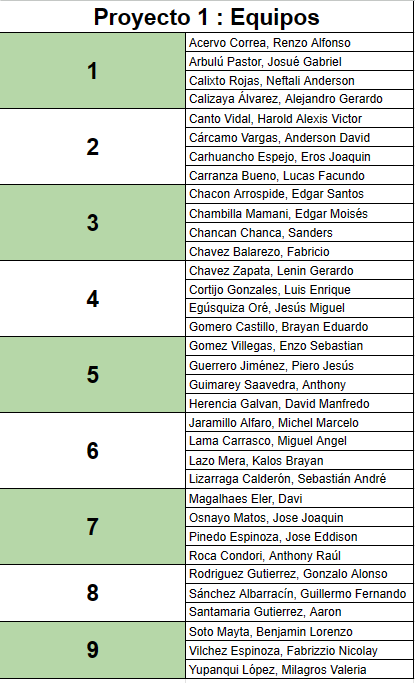